In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/T_NK/others_V2/combine/")

In [3]:
## read data
adata = sc.read_h5ad("./other.bySample.n10.bbknn_umap_leiden_marker.res0.6.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

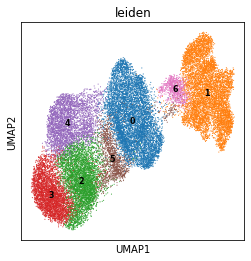

In [4]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

In [5]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

,0,1,2,3,4,5,6
0,GZMK,LTB,NKG7,B2M,FGFBP2,SELL,CD3D
1,CCL4,IL7R,CST7,TMSB4X,SPON2,GNLY,CD3E
2,SRGN,LST1,FGFBP2,GZMB,CST7,CTSW,IL7R
3,XCL1,ZFP36L1,GNLY,PRF1,PRF1,EEF1A1,LTB
4,DUSP2,NFKBIA,SH3BGRL3,NKG7,SYNE2,GZMK,GAPDH
5,XCL2,CD52,GZMB,CYBA,FLNA,CMC1,CD52
6,CCL3,FOSB,B2M,PLAC8,FCGR3A,XCL1,HSPA1B
7,CMC1,DUSP1,LITAF,FGFBP2,EFHD2,KLRC1,HSP90AA1
8,CD69,TNFAIP3,IFITM1,MALAT1,GZMB,FXYD5,RGS1
9,COTL1,KIT,PFN1,HLA-C,TMSB10,IFITM2,CAMK4


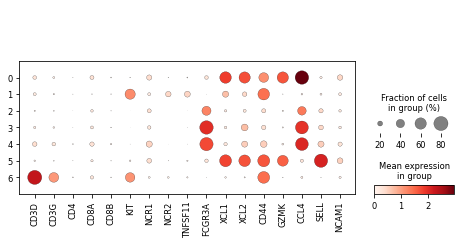

In [6]:
sc.pl.dotplot(adata,
    [ "CD3D","CD3G","CD4","CD8A","CD8B",
     "KIT","NCR1","NCR2","TNFSF11", # NCR+ ILCs
     "FCGR3A", # CD16+ NK
     "XCL1","XCL2","CD44","GZMK","CCL4",
     "SELL","NCAM1"
      ], groupby="leiden")

In [7]:
adata.obs["label"] = "T/NK_other"

select = adata.obs[ adata.obs.leiden.isin(['1']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'NCR+ ILC3'

select = adata.obs[ adata.obs.leiden.isin(['6']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'NCR- ILC3'

select = adata.obs[ adata.obs.leiden.isin(['2','3','4']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD16+ NK'

select = adata.obs[ adata.obs.leiden.isin(['0']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD56+ SELL_low NK'

select = adata.obs[ adata.obs.leiden.isin(['5']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD56+ SELL_high NK'

... storing 'label' as categorical


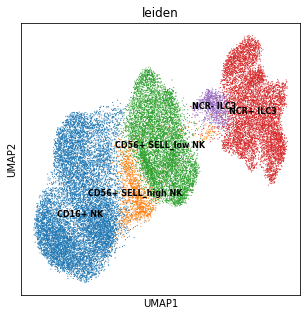

In [8]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='label', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8, save=".png")

In [9]:
newOrder = ['NCR- ILC3','NCR+ ILC3','CD16+ NK','CD56+ SELL_high NK','CD56+ SELL_low NK']
adata.obs.label =pd.Categorical(adata.obs.label)
adata.obs.label = adata.obs.label.cat.set_categories( newOrder )

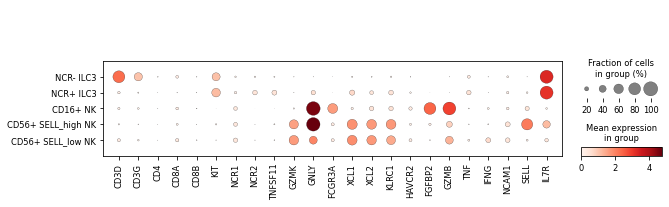

In [10]:
sc.pl.dotplot(adata,
    [ "CD3D","CD3G","CD4","CD8A","CD8B",
     "KIT","NCR1","NCR2","TNFSF11", # NCR+ ILCs
     "GZMK","GNLY","FCGR3A","XCL1","XCL2","KLRC1","HAVCR2","FGFBP2","GZMB","TNF","IFNG",
     "NCAM1","SELL","IL7R"
      ], groupby="label")

In [11]:
adata.obs["major"] = "ILC"

In [12]:
adata = adata.raw.to_adata()

In [13]:
adata.write_h5ad("ILC.clean.h5ad")

... storing 'major' as categorical


In [14]:
adata.write_loom("ILC.clean.loom", write_obsm_varm=True)

In [15]:
# done